<a href="https://colab.research.google.com/github/rareshnz/Licenta_Ciuperci/blob/main/EfiicientNetB0_ciuperci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
dataset_path = "/content/drive/MyDrive/Mushrooms"


categories = categories = ["Agaricus", "Amanita", "Boletus", "Cortinarius", "Entoloma", "Exidia", "Hygrocybe", "Inocybe", "Lactarius", "Pluteus", "Russula", "Suillus"]
num_categories = len(categories)
X = []
y = []

In [ ]:
for idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(idx)

X = np.array(X)
y = np.array(y)

In [ ]:
X_preprocessed = preprocess_input(X)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [ ]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_categories, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_val, y_val))


16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/30
239/239 [==============================] - 90s 319ms/step - loss: 1.3877 - accuracy: 0.5340 - val_loss: 0.9361 - val_accuracy: 0.7053
Epoch 2/30
239/239 [==============================] - 73s 304ms/step - loss: 0.9509 - accuracy: 0.6811 - val_loss: 0.8172 - val_accuracy: 0.7305
Epoch 3/30
239/239 [==============================] - 73s 305ms/step - loss: 0.8173 - accuracy: 0.7288 - val_loss: 0.7499 - val_accuracy: 0.7520
Epoch 4/30
239/239 [==============================] - 74s 309ms/step - loss: 0.7384 - accuracy: 0.7494 - val_loss: 0.6978 - val_accuracy: 0.7635
Epoch 5/30
239/239 [==============================] - 73s 304ms/step - loss: 0.6920 - accuracy: 0.7633 - val_loss: 0.6819 - val_accuracy: 0.7677
Epoch 6/30
239/239 [==============================] - 73s 304ms/step - loss: 0.6351 - accuracy: 0.7794 - val_loss: 0.6472 - val_accuracy: 0.7824
Epoch 7/30
239/239 [==============================] - 72s 302ms/s

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [ ]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


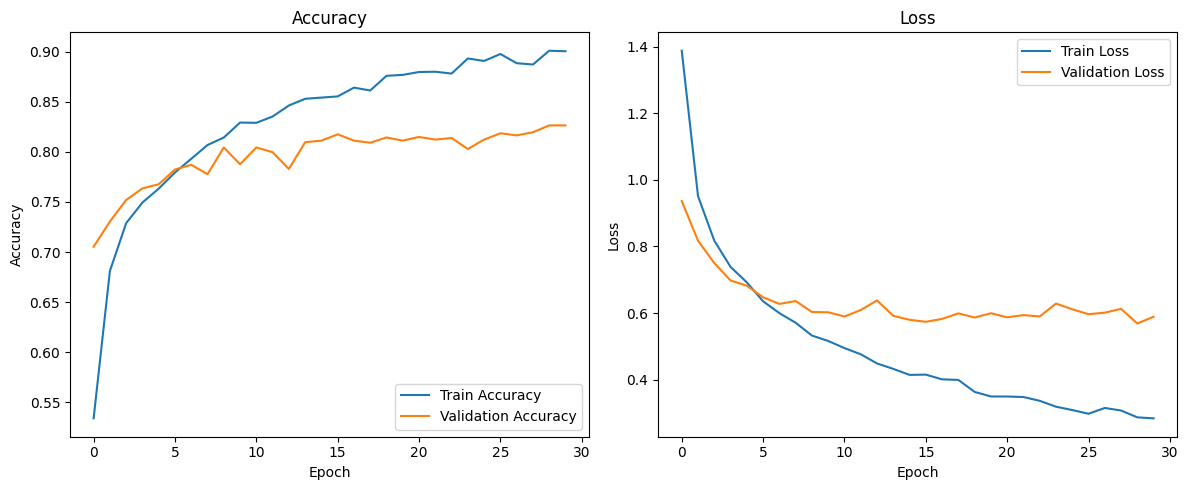

In [ ]:
plot_training_history(history)

60/60 [==============================] - 5s 51ms/step


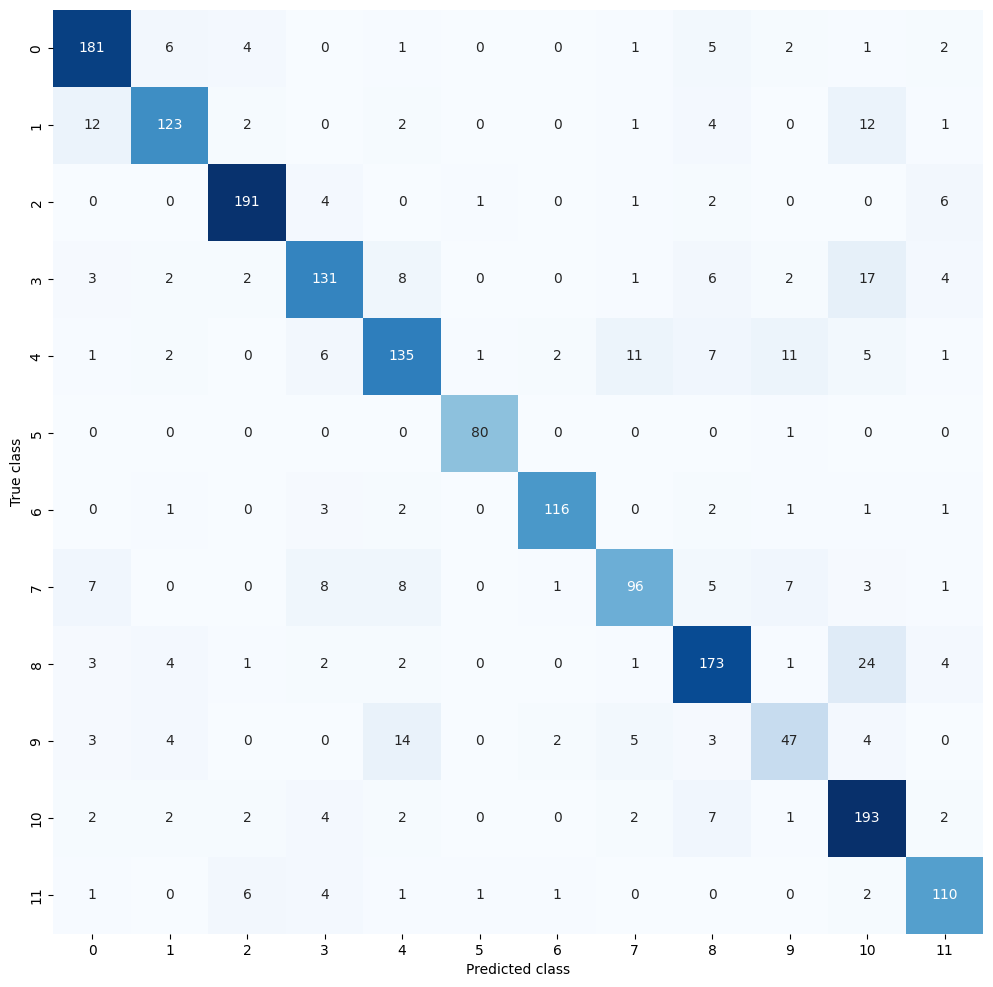

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_val, y_val):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

plot_confusion_matrix(model, X_val, y_val)

60/60 [==============================] - 3s 50ms/step


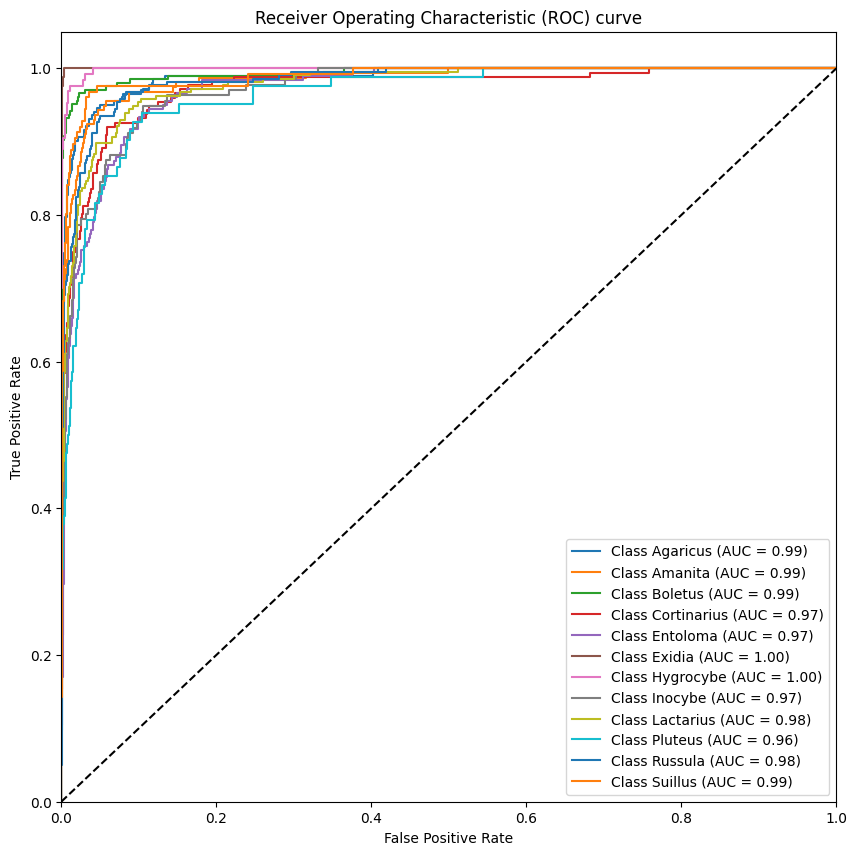

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_and_auc(model, X_val, y_val, categories):
    n_classes = len(categories)

    y_val_binarized = label_binarize(y_val, classes=np.arange(n_classes))
    y_pred = model.predict(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_val_binarized[:, i], y_pred[:, i])

    # Plot ROC curve
    plt.figure(figsize=(10, 10))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {categories[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_and_auc(model, X_val, y_val, categories)

In [ ]:
from sklearn.metrics import classification_report


def print_classification_report(model, X_val, y_val, categories):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    report = classification_report(y_val, y_pred, target_names=categories)
    print(report)

print_classification_report(model, X_val, y_val, categories)

60/60 [==============================] - 3s 50ms/step
              precision    recall  f1-score   support

    Agaricus       0.85      0.89      0.87       203
     Amanita       0.85      0.78      0.82       157
     Boletus       0.92      0.93      0.92       205
 Cortinarius       0.81      0.74      0.78       176
    Entoloma       0.77      0.74      0.76       182
      Exidia       0.96      0.99      0.98        81
   Hygrocybe       0.95      0.91      0.93       127
     Inocybe       0.81      0.71      0.75       136
   Lactarius       0.81      0.80      0.81       215
     Pluteus       0.64      0.57      0.61        82
     Russula       0.74      0.89      0.81       217
     Suillus       0.83      0.87      0.85       126

    accuracy                           0.83      1907
   macro avg       0.83      0.82      0.82      1907
weighted avg       0.83      0.83      0.83      1907



In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
kappa = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa:", kappa)

60/60 [==============================] - 3s 50ms/step
Cohen's Kappa: 0.8089488930865999


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
false_positive_rate = cm.sum(axis=0) / cm.sum()
false_negative_rate = cm.sum(axis=1) / cm.sum()
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

60/60 [==============================] - 3s 50ms/step
False Positive Rate: [0.11169376 0.07551127 0.10907184 0.08495018 0.09176717 0.04352386
 0.06397483 0.06240168 0.11221814 0.03828002 0.13738857 0.06921867]
False Negative Rate: [0.10644992 0.08232826 0.10749869 0.09229156 0.09543786 0.04247509
 0.06659675 0.0713162  0.11274253 0.04299948 0.1137913  0.06607236]


In [ ]:
import os
import cv2
import numpy as np

from sklearn.metrics import accuracy_score

def evaluate_model_on_test_set(model, test_dataset_path, categories):
    X_test = []
    y_test = []


    for idx, category in enumerate(categories):
        category_path = os.path.join(test_dataset_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            X_test.append(img)
            y_test.append(idx)


    X_test = np.array(X_test)
    y_test = np.array(y_test)


    X_test_preprocessed = preprocess_input(X_test)


    predictions = model.predict(X_test_preprocessed)
    predicted_classes = np.argmax(predictions, axis=1)


    accuracy = accuracy_score(y_test, predicted_classes)

    return accuracy


test_dataset_path = "/content/drive/MyDrive/Test_Images"
categories = ["Agaricus", "Amanita", "Boletus", "Cortinarius", "Entoloma", "Exidia", "Hygrocybe", "Inocybe", "Lactarius", "Pluteus", "Russula", "Suillus"]


accuracy = evaluate_model_on_test_set(model, test_dataset_path, categories)
print(f"Acuratețea pe setul de date de test este: {accuracy:.2%}")


6/6 [==============================] - 1s 214ms/step
Acuratețea pe setul de date de test este: 76.60%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import efficientnet
import numpy as np

image_paths = [
    '/content/drive/My Drive/poze_reale/1.jpg',
    '/content/drive/My Drive/poze_reale/2.jpg',
    '/content/drive/My Drive/poze_reale/3.jpg',
    '/content/drive/My Drive/poze_reale/4.jpg',
    '/content/drive/My Drive/poze_reale/5.jpg',
    '/content/drive/My Drive/poze_reale/6.jpg',
    '/content/drive/My Drive/poze_reale/7.jpg',
    '/content/drive/My Drive/poze_reale/8.jpg',
    '/content/drive/My Drive/poze_reale/9.jpg',
    '/content/drive/My Drive/poze_reale/10.jpg',
    '/content/drive/My Drive/poze_reale/11.jpg'

]

for image_path in image_paths:
    image = load_img(image_path, target_size=(224, 224))  # Adjust target_size depending on the EfficientNet version you're using
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = efficientnet.preprocess_input(image)  # Preprocess the image
    pred = model.predict(image)
    class_index = np.argmax(pred)

    print("Predicted class index for image", image_path, ":", class_index)
    print("Predicted probabilities:", pred)

1/1 [==============================] - 2s 2s/step
Predicted class index for image /content/drive/My Drive/poze_reale/1.jpg : 1
Predicted probabilities: [[1.0857214e-06 9.9999893e-01 4.3390179e-12 2.6829403e-10 1.8220944e-10
  4.2709078e-12 6.8153800e-13 6.1129712e-10 3.2720018e-09 3.1485747e-09
  2.3086146e-08 2.4006351e-11]]
1/1 [==============================] - 0s 25ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/2.jpg : 2
Predicted probabilities: [[3.4008224e-07 1.0538754e-05 9.6480465e-01 8.1427291e-04 1.3989711e-06
  6.1842900e-07 4.6308492e-06 2.2913340e-05 4.1811134e-05 5.7712292e-05
  1.5721525e-04 3.4083817e-02]]
1/1 [==============================] - 0s 25ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/3.jpg : 1
Predicted probabilities: [[2.3826560e-06 9.9546450e-01 2.7162403e-06 8.4455278e-05 2.3535758e-05
  4.6425674e-05 2.8705650e-05 1.8136042e-06 2.9209701e-04 3.4064269e-03
  6.4687949e-04 5.9811306e-08]]
1/1 [=======

fine tuning

In [ ]:
for layer in base_model.layers[-20:]:
    layer.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_fine_tuning = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
239/239 [==============================] - 84s 312ms/step - loss: 0.6805 - accuracy: 0.7941 - val_loss: 0.7325 - val_accuracy: 0.8007
Epoch 2/20
239/239 [==============================] - 74s 309ms/step - loss: 0.4045 - accuracy: 0.8586 - val_loss: 0.6664 - val_accuracy: 0.8165
Epoch 3/20
239/239 [==============================] - 73s 307ms/step - loss: 0.3138 - accuracy: 0.8909 - val_loss: 0.6377 - val_accuracy: 0.8317
Epoch 4/20
239/239 [==============================] - 73s 304ms/step - loss: 0.2662 - accuracy: 0.9073 - val_loss: 0.6117 - val_accuracy: 0.8369
Epoch 5/20
239/239 [==============================] - 73s 305ms/step - loss: 0.2401 - accuracy: 0.9179 - val_loss: 0.5962 - val_accuracy: 0.8479
Epoch 6/20
239/239 [==============================] - 73s 304ms/step - loss: 0.2141 - accuracy: 0.9291 - val_loss: 0.6127 - val_accuracy: 0.8490
Epoch 7/20
239/239 [==============================] - 72s 302ms/step - loss: 0.1950 - accuracy: 0.9338 - val_loss: 0.5912 - val_ac

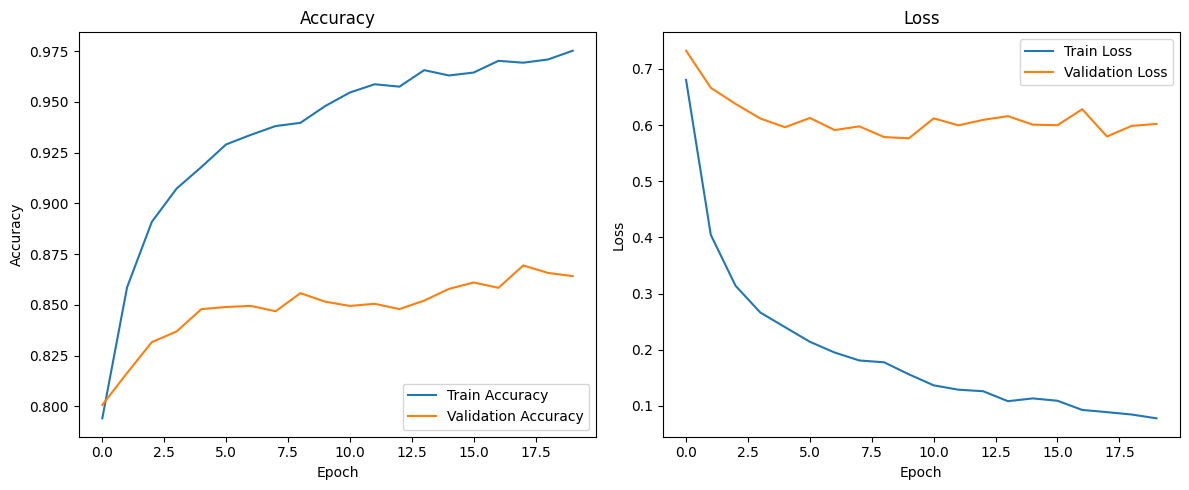

In [ ]:
plot_training_history(history_fine_tuning)

60/60 [==============================] - 5s 56ms/step


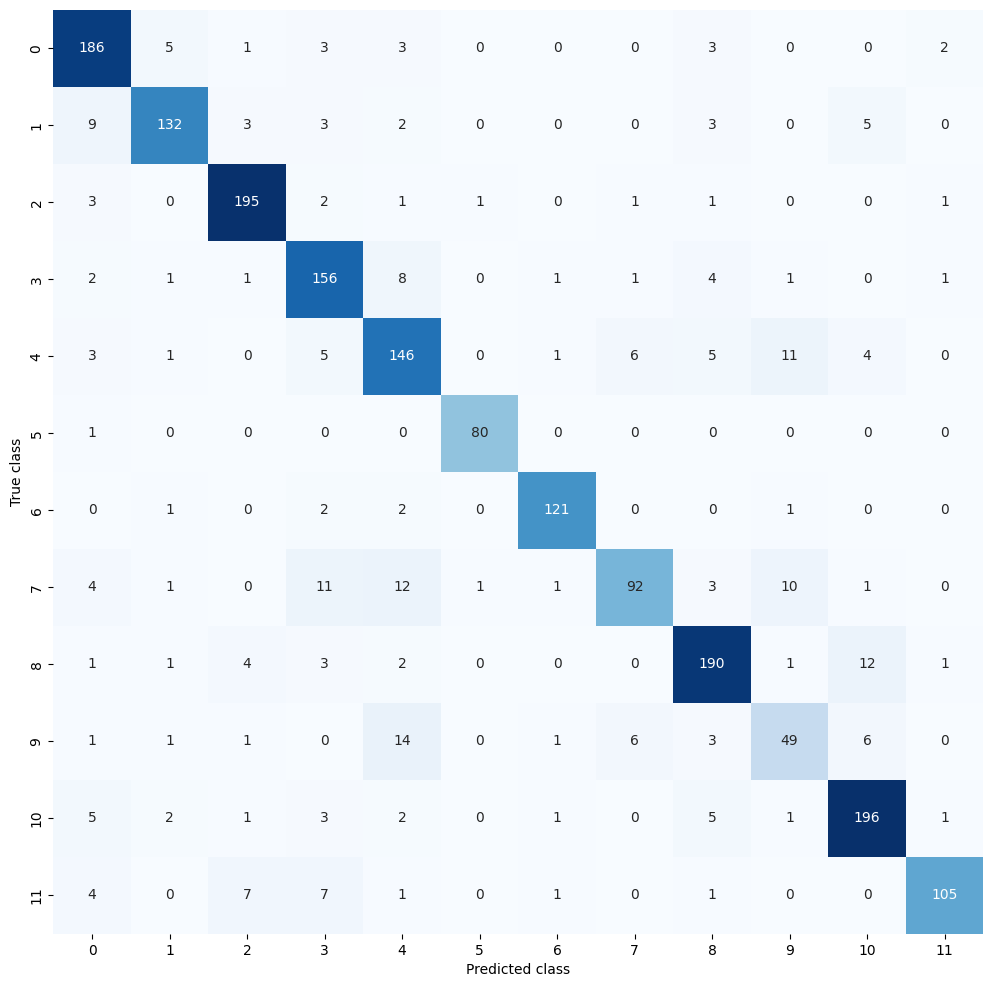

In [ ]:
plot_confusion_matrix(model, X_val, y_val)

In [ ]:
print_classification_report(model, X_val, y_val, categories)

60/60 [==============================] - 3s 53ms/step
              precision    recall  f1-score   support

    Agaricus       0.85      0.92      0.88       203
     Amanita       0.91      0.84      0.87       157
     Boletus       0.92      0.95      0.93       205
 Cortinarius       0.80      0.89      0.84       176
    Entoloma       0.76      0.80      0.78       182
      Exidia       0.98      0.99      0.98        81
   Hygrocybe       0.95      0.95      0.95       127
     Inocybe       0.87      0.68      0.76       136
   Lactarius       0.87      0.88      0.88       215
     Pluteus       0.66      0.60      0.63        82
     Russula       0.88      0.90      0.89       217
     Suillus       0.95      0.83      0.89       126

    accuracy                           0.86      1907
   macro avg       0.87      0.85      0.86      1907
weighted avg       0.87      0.86      0.86      1907



60/60 [==============================] - 3s 53ms/step


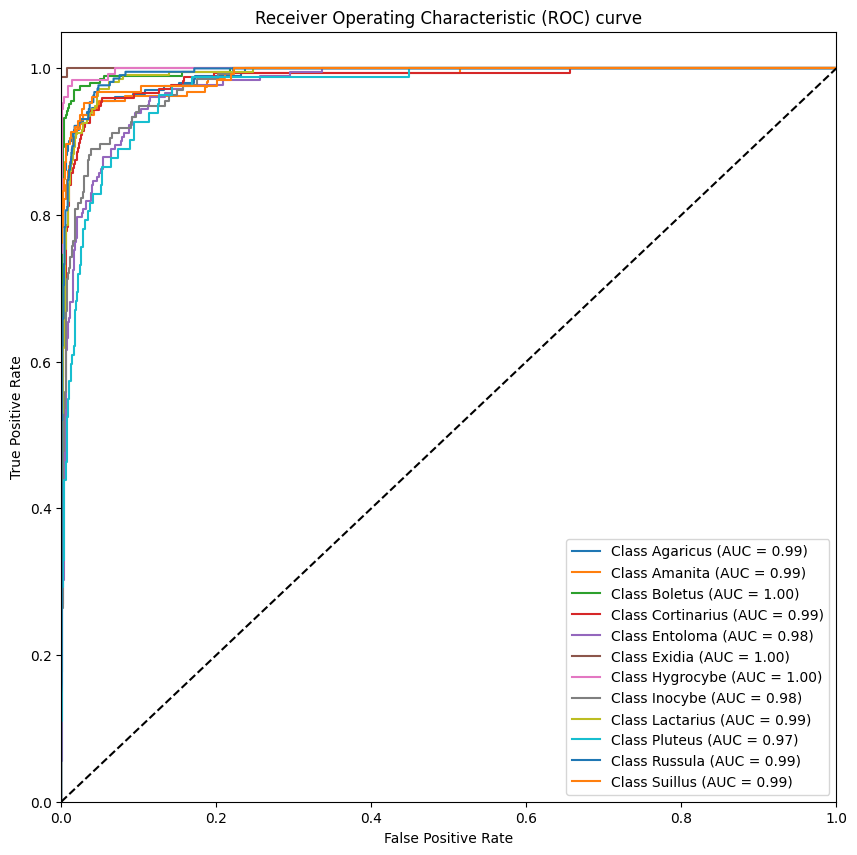

In [ ]:
plot_roc_and_auc(model, X_val, y_val, categories)

In [ ]:
y_pred = np.argmax(model.predict(X_val), axis=1)
kappa = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa:", kappa)

60/60 [==============================] - 3s 52ms/step
Cohen's Kappa: 0.8504923572699696


In [ ]:
y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
false_positive_rate = cm.sum(axis=0) / cm.sum()
false_negative_rate = cm.sum(axis=1) / cm.sum()
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

60/60 [==============================] - 3s 53ms/step
False Positive Rate: [0.11484006 0.07603566 0.11169376 0.10225485 0.10120608 0.04299948
 0.06659675 0.05558469 0.11431568 0.0388044  0.11746198 0.05820661]
False Negative Rate: [0.10644992 0.08232826 0.10749869 0.09229156 0.09543786 0.04247509
 0.06659675 0.0713162  0.11274253 0.04299948 0.1137913  0.06607236]


In [ ]:
accuracy = evaluate_model_on_test_set(model, test_dataset_path, categories)
print(f"Acuratețea pe setul de date de test este: {accuracy:.2%}")


6/6 [==============================] - 0s 62ms/step
Acuratețea pe setul de date de test este: 82.45%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_paths = [
    '/content/drive/My Drive/poze_reale/1.jpg',
    '/content/drive/My Drive/poze_reale/2.jpg',
    '/content/drive/My Drive/poze_reale/3.jpg',
    '/content/drive/My Drive/poze_reale/4.jpg',
    '/content/drive/My Drive/poze_reale/5.jpg',
    '/content/drive/My Drive/poze_reale/6.jpg',
    '/content/drive/My Drive/poze_reale/7.jpg',
    '/content/drive/My Drive/poze_reale/8.jpg',
    '/content/drive/My Drive/poze_reale/9.jpg',
    '/content/drive/My Drive/poze_reale/10.jpg',
    '/content/drive/My Drive/poze_reale/11.jpg'

]

for image_path in image_paths:

    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    pred = model.predict(image)
    class_index = np.argmax(pred)

    print("Predicted class index for image", image_path, ":", class_index)
    print("Predicted probabilities:", pred)

1/1 [==============================] - 0s 23ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/1.jpg : 11
Predicted probabilities: [[0.0961963  0.08655474 0.08589393 0.09077405 0.05890934 0.07900637
  0.05747454 0.09258015 0.08315371 0.08278899 0.09006374 0.09660417]]
1/1 [==============================] - 0s 24ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/2.jpg : 11
Predicted probabilities: [[0.09563585 0.0864713  0.08614948 0.09048872 0.05872061 0.07920839
  0.05811903 0.09232744 0.08280995 0.08278808 0.09031375 0.09696735]]
1/1 [==============================] - 0s 25ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/3.jpg : 11
Predicted probabilities: [[0.09579793 0.08644093 0.08596583 0.09042249 0.05891121 0.07929942
  0.05787773 0.09242195 0.08296609 0.08278386 0.09031156 0.09680097]]
1/1 [==============================] - 0s 23ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/4.